In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-professional-dataset/Depression Professional Dataset.csv


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

df = pd.read_csv('/kaggle/input/depression-professional-dataset/Depression Professional Dataset.csv')

df

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
2049,Female,45,1.0,3.0,Less than 5 hours,Healthy,Yes,2,5,Yes,No
2050,Male,25,1.0,5.0,5-6 hours,Healthy,Yes,12,3,Yes,No
2051,Female,23,3.0,1.0,Less than 5 hours,Moderate,Yes,8,3,No,Yes
2052,Female,24,1.0,4.0,Less than 5 hours,Moderate,Yes,4,4,No,No


1. Data Understanding

In [3]:
print("data shape: ", df.shape)

data shape:  (2054, 11)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2054 non-null   object 
 1   Age                                    2054 non-null   int64  
 2   Work Pressure                          2054 non-null   float64
 3   Job Satisfaction                       2054 non-null   float64
 4   Sleep Duration                         2054 non-null   object 
 5   Dietary Habits                         2054 non-null   object 
 6   Have you ever had suicidal thoughts ?  2054 non-null   object 
 7   Work Hours                             2054 non-null   int64  
 8   Financial Stress                       2054 non-null   int64  
 9   Family History of Mental Illness       2054 non-null   object 
 10  Depression                             2054 non-null   object 
dtypes: f

In [5]:
df.describe()

,Age,Work Pressure,Job Satisfaction,Work Hours,Financial Stress
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,42.171860,3.021908,3.015093,5.930867,2.978578
std,11.461202,1.417312,1.418432,3.773945,1.413362
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,35.000000,2.000000,2.000000,3.000000,2.000000
50%,43.000000,3.000000,3.000000,6.000000,3.000000
75%,51.750000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,12.000000,5.000000


In [6]:
df.Depression.value_counts()

Depression
No     1851
Yes     203
Name: count, dtype: int64

In [7]:
df.Gender.value_counts()

Gender
Male      1066
Female     988
Name: count, dtype: int64

In [8]:
df.columns = df.columns.str.replace(' ', '_')
print(df.columns)

Index(['Gender', 'Age', 'Work_Pressure', 'Job_Satisfaction', 'Sleep_Duration',
       'Dietary_Habits', 'Have_you_ever_had_suicidal_thoughts_?', 'Work_Hours',
       'Financial_Stress', 'Family_History_of_Mental_Illness', 'Depression'],
      dtype='object')


In [9]:
df

,Gender,Age,Work_Pressure,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Have_you_ever_had_suicidal_thoughts_?,Work_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
2049,Female,45,1.0,3.0,Less than 5 hours,Healthy,Yes,2,5,Yes,No
2050,Male,25,1.0,5.0,5-6 hours,Healthy,Yes,12,3,Yes,No
2051,Female,23,3.0,1.0,Less than 5 hours,Moderate,Yes,8,3,No,Yes
2052,Female,24,1.0,4.0,Less than 5 hours,Moderate,Yes,4,4,No,No


In [10]:
df.Financial_Stress.value_counts()

Financial_Stress
2    447
4    407
1    407
5    405
3    388
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

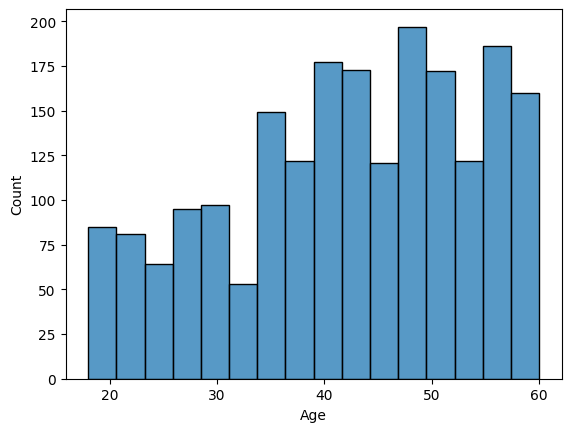

In [11]:
sns.histplot(df['Age'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Gender', ylabel='Count'>

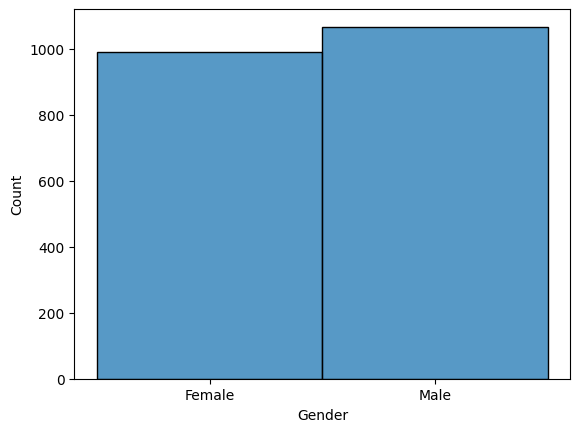

In [12]:
sns.histplot(df['Gender'])

2. Data Cleaning

In [13]:
df.isnull().sum()

Gender                                   0
Age                                      0
Work_Pressure                            0
Job_Satisfaction                         0
Sleep_Duration                           0
Dietary_Habits                           0
Have_you_ever_had_suicidal_thoughts_?    0
Work_Hours                               0
Financial_Stress                         0
Family_History_of_Mental_Illness         0
Depression                               0
dtype: int64

In [14]:
df.duplicated().sum()

0

3. Exploratory Data Analition (EDA)

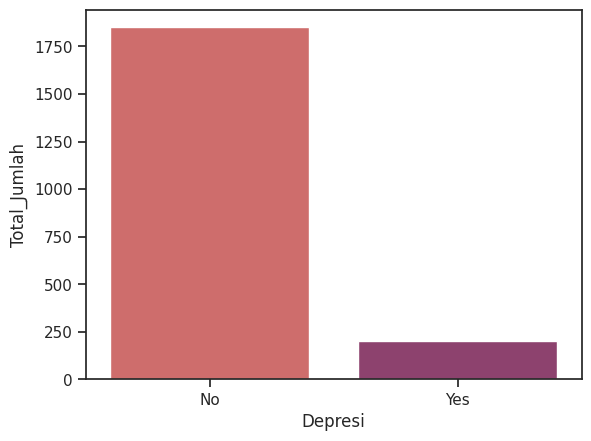

In [15]:
sns.set_theme(style='ticks')
sns.countplot(x='Depression', data=df, palette='flare')
plt.xlabel("Depresi")
plt.ylabel("Total_Jumlah")
plt.show()

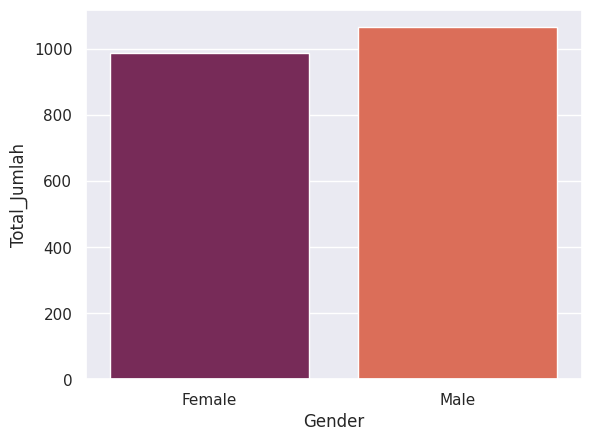

In [16]:
sns.set_theme(style='darkgrid')
sns.countplot(x='Gender', data=df, palette='rocket')
plt.xlabel("Gender")
plt.ylabel("Total_Jumlah")
plt.show()

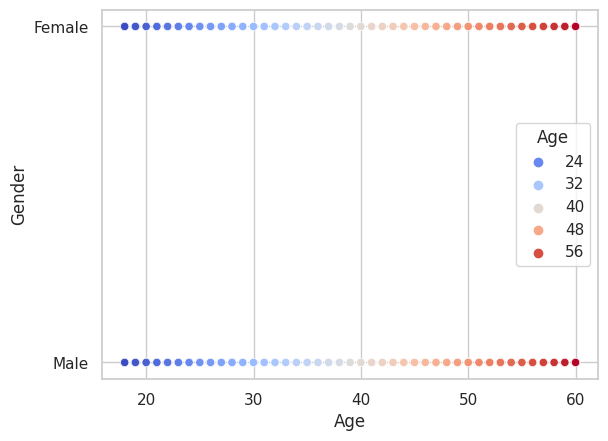

In [17]:
sns.set_theme(style='whitegrid')
sns.scatterplot(x='Age', y='Gender', data=df, hue='Age', palette='coolwarm')
plt.xlabel("Age")
plt.ylabel("Gender")
plt.show()

4. Data Preparation

In [18]:
df.columns = df.columns.str.replace(' ', '_')
print(df.columns)
df.head()

Index(['Gender', 'Age', 'Work_Pressure', 'Job_Satisfaction', 'Sleep_Duration',
       'Dietary_Habits', 'Have_you_ever_had_suicidal_thoughts_?', 'Work_Hours',
       'Financial_Stress', 'Family_History_of_Mental_Illness', 'Depression'],
      dtype='object')


,Gender,Age,Work_Pressure,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Have_you_ever_had_suicidal_thoughts_?,Work_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 2054 non-null   object 
 1   Age                                    2054 non-null   int64  
 2   Work_Pressure                          2054 non-null   float64
 3   Job_Satisfaction                       2054 non-null   float64
 4   Sleep_Duration                         2054 non-null   object 
 5   Dietary_Habits                         2054 non-null   object 
 6   Have_you_ever_had_suicidal_thoughts_?  2054 non-null   object 
 7   Work_Hours                             2054 non-null   int64  
 8   Financial_Stress                       2054 non-null   int64  
 9   Family_History_of_Mental_Illness       2054 non-null   object 
 10  Depression                             2054 non-null   object 
dtypes: f

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Sleep_Duration'] = label_encoder.fit_transform(df['Sleep_Duration'])
df['Dietary_Habits'] = label_encoder.fit_transform(df['Dietary_Habits'])
df['Have_you_ever_had_suicidal_thoughts_?'] = label_encoder.fit_transform(df['Have_you_ever_had_suicidal_thoughts_?'])
df['Family_History_of_Mental_Illness'] = label_encoder.fit_transform(df['Family_History_of_Mental_Illness'])
df['Depression'] = label_encoder.fit_transform(df['Depression'])

In [21]:
df.head()

,Gender,Age,Work_Pressure,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Have_you_ever_had_suicidal_thoughts_?,Work_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
0,0,37,2.0,4.0,1,1,0,6,2,0,0
1,1,60,4.0,3.0,0,2,1,0,4,1,0
2,0,42,2.0,3.0,0,1,0,0,2,0,0
3,0,44,3.0,5.0,1,0,1,1,2,1,0
4,1,48,4.0,3.0,1,1,1,6,5,1,0


In [22]:
x = df.drop(columns = ['Depression'])
y = df['Depression']

print('x =  ', x.shape)
print('y =  ', y.shape)

x =   (2054, 10)
y =   (2054,)


In [23]:
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size=0.2,random_state= 42)

In [24]:
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

x_train:  (1643, 10)
y_train:  (1643,)
x_test:  (411, 10)
y_test:  (411,)


4. Modelling

In [25]:
knn = KNeighborsClassifier(n_neighbors= 5)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_pred, y_test))
print("Akurasi KNN: {:.2f}%".format(KNN_acc*100))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       385
           1       0.49      0.81      0.61        26

    accuracy                           0.93       411
   macro avg       0.74      0.88      0.79       411
weighted avg       0.95      0.93      0.94       411

Akurasi KNN: 93.43%


In [26]:
testing = {
    'Gender' : [1],
    'Age' : [20],
    'Work_Pressure' : [2.0],
    'Job_Satisfaction' : [4.0],
    'Sleep_Duration' : [0],
    'Dietary_Habits' : [1],
    'Have_you_ever_had_suicidal_thoughts_?' : [0],
    'Work_Hours' : [3],
    'Financial_Stress' : [2],
    'Family_History_of_Mental_Illness' : [1]
}

testing = pd.DataFrame(testing)
testing

,Gender,Age,Work_Pressure,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Have_you_ever_had_suicidal_thoughts_?,Work_Hours,Financial_Stress,Family_History_of_Mental_Illness
0,1,20,2.0,4.0,0,1,0,3,2,1


In [27]:
pred_coba = knn.predict(testing)
print('Hasil Prediksi dari Tingkat Depresi Saya: ', pred_coba)

Hasil Prediksi dari Tingkat Depresi Saya:  [0]
